In [1]:
import sys; sys.path.append('..')
from sklearn import svm
from feature_extraction import bow_occurrences, bow_tfidf, bow_tfidf_df
from preprocess_tweets import read_annotated_tweets, clean_tweets
from sklearn import metrics
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score, train_test_split
from numpy import mean, std
import matplotlib.pylab as plt 


In [2]:
df = read_annotated_tweets(os.path.abspath('../data/classified/england_italy_tweets_classified1.csv'))
clean_tweets(df)



In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(bow_tfidf(
                                                                    df['tweet_text'], (2,2)), 
                                                                    df['label'], test_size=0.2, 
                                                                    random_state=6
                                                                    )

print(X_test)
print(X_test.shape)


  (1, 373)	0.3779644730092272
  (1, 381)	0.3779644730092272
  (1, 957)	0.3779644730092272
  (1, 407)	0.3779644730092272
  (1, 415)	0.3779644730092272
  (1, 382)	0.3779644730092272
  (1, 962)	0.3779644730092272
  (2, 861)	0.4472135954999579
  (2, 981)	0.4472135954999579
  (2, 671)	0.4472135954999579
  (2, 612)	0.4472135954999579
  (2, 685)	0.4472135954999579
  (3, 863)	0.7071067811865476
  (3, 1099)	0.7071067811865476
  (4, 974)	0.7071067811865476
  (4, 872)	0.7071067811865476
  (6, 445)	0.7071067811865476
  (6, 772)	0.7071067811865476
  (7, 413)	0.408248290463863
  (7, 1064)	0.408248290463863
  (7, 345)	0.408248290463863
  (7, 515)	0.408248290463863
  (7, 352)	0.408248290463863
  (7, 732)	0.408248290463863
  (8, 1094)	0.5773502691896257
  :	:
  (53, 422)	0.2886751345948129
  (53, 546)	0.2886751345948129
  (53, 647)	0.2886751345948129
  (53, 1072)	0.2886751345948129
  (53, 10)	0.2886751345948129
  (53, 936)	0.2886751345948129
  (53, 648)	0.2886751345948129
  (53, 190)	0.2886751345948129

In [95]:
k_fold = KFold(n_splits=10, random_state=1, shuffle=True)
rs = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

svm_model = svm.SVC(kernel='linear')

scores = cross_val_score(svm_model, X_train, Y_train, cv=rs)

print(scores)
print(mean(scores))
print(std(scores))


[0.4375     0.4375     0.4375     0.45833333 0.54166667 0.4375
 0.47916667 0.375      0.29166667 0.4375    ]
0.4333333333333334
0.061661035778953086


In [96]:
svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, Y_train)

predicted = svm_model.predict(X_test)
acc_score = metrics.accuracy_score(predicted, Y_test)
prec_score = metrics.precision_score(predicted, Y_test, average='macro')
rec_score = metrics.recall_score(predicted, Y_test, average='macro')
f1_score = metrics.f1_score(predicted, Y_test, average='macro')

print(acc_score)
print(prec_score)
print(rec_score)
print(f1_score)

0.5
0.3333333333333333
0.16666666666666666
0.2222222222222222


/home/anze/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.46168374522804906, 0.447356678174687, 0.2222222222222222, 0.42265795206971674]
[0.5833333333333334, 0.5833333333333334, 0.5, 0.5833333333333334]


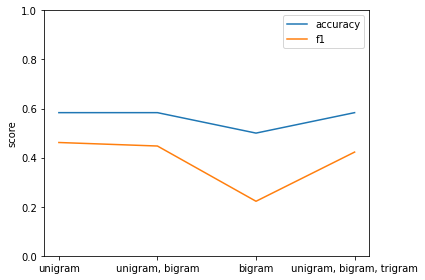

In [117]:

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(bow_tfidf(
                                                                    df['tweet_text'], (1,1)), 
                                                                    df['label'], test_size=0.2, 
                                                                    random_state=6
                                                                    )

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(bow_tfidf(
                                                                    df['tweet_text'], (1,2)), 
                                                                    df['label'], test_size=0.2, 
                                                                    random_state=6
                                                                    )

X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(bow_tfidf(
                                                                    df['tweet_text'], (2,2)), 
                                                                    df['label'], test_size=0.2, 
                                                                    random_state=6
                                                                    )

X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(bow_tfidf(
                                                                    df['tweet_text'], (1,3)), 
                                                                    df['label'], test_size=0.2, 
                                                                    random_state=6
                                                                    )


svm_model_1 = svm.SVC(kernel='linear')
svm_model_1.fit(X_train_1, Y_train_1)
predicted_1 = svm_model_1.predict(X_test_1)

svm_model_2 = svm.SVC(kernel='linear')
svm_model_2.fit(X_train_2, Y_train_2)
predicted_2 = svm_model_2.predict(X_test_2)

svm_model_3 = svm.SVC(kernel='linear')
svm_model_3.fit(X_train_3, Y_train_3)
predicted_3 = svm_model_3.predict(X_test_3)

svm_model_4 = svm.SVC(kernel='linear')
svm_model_4.fit(X_train_4, Y_train_4)
predicted_4 = svm_model_4.predict(X_test_4)

acc_score_1 = metrics.accuracy_score(predicted_1, Y_test_1)
acc_score_2 = metrics.accuracy_score(predicted_2, Y_test_2)
acc_score_3 = metrics.accuracy_score(predicted_3, Y_test_3)
acc_score_4 = metrics.accuracy_score(predicted_4, Y_test_4)

f1_score_1 = metrics.f1_score(predicted_1, Y_test_1, average='macro')
f1_score_2 = metrics.f1_score(predicted_2, Y_test_2, average='macro')
f1_score_3 = metrics.f1_score(predicted_3, Y_test_3, average='macro')
f1_score_4 = metrics.f1_score(predicted_4, Y_test_4, average='macro')

scores = [acc_score_1, acc_score_2, acc_score_3, acc_score_4]
f1_socres = [f1_score_1, f1_score_2, f1_score_3, f1_score_4]
labels = ['unigram', 'unigram, bigram', 'bigram', 'unigram, bigram, trigram']
print(f1_socres)
print(scores)
plt.plot(labels,scores, label='accuracy')
plt.plot(labels,f1_socres, label='f1')
plt.ylabel('score')
plt.ylim((0,1))
plt.tight_layout()
plt.legend()
#plt.savefig("../figs/svm_ngrams_compare.png")
plt.show()

